# Flight Price Prediction

In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# reading the train dataset

df_train = pd.read_excel("Data_Train.xlsx")

In [3]:
# Reading the test dataset

df_test =pd.read_excel("Test_set.xlsx")

In [4]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
# df_train shows the dataset which contains 10683 rows and 11 columns
# The main important thing here is that our target column is Price. 
# So we are building the model to predict the Flight Price based on the other column infos 
# and here the target column "Price" has continuous values and hence its a regression problem. 
# We need to choose the regression models to solve this problem

In [6]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [7]:
# df_test shows the dataset which contains 2671 rows and 10 columns
# Here we can observe that we have 10 columns and column "Price" is not present in our test dataset as we saw in train dataset 
# Meaning we are building the model to predict the Price based on the other column infos  
# We need to choose the regression models to do so 


Using regression models in this project to predict the flight price on our test dataset.

# Exploratory Data Analysis (EDA)

In [8]:
df_train.head()   

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
# df_train.head() displays the first 5 row values(indexed from 0-4) from the train dataset

In [10]:
df_train.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [11]:
# df.tail() displays the last 5 rows from the training dataset(indexed from 10678-10682), 
# so from here we can draw conclusion that we have 10693 rows in total in our training set

In [12]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [13]:
# df_test.head() displays the first 5 row values(indexed from 0-4) from the test dataset

In [14]:
df_test.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info


In [15]:
# df.tail() displays the last 5 rows from the testing dataset(indexed from 2666-2670), 
# so from here we can draw conclusion that we have 2671 rows in total in our testing set

In [16]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [17]:
# df.columns displays the list of all column headings in our training dataset
# We have 11 columns including Price in training set

In [18]:
df_test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [19]:
# df.columns displays the list of all column headings in our testing dataset
# We have 10 columns excluding Price in testing set

In [20]:
df_train.shape

(10683, 11)

In [21]:
# No. of rows in training set is 10683
# No. of columns is training set is 11

In [22]:
df_test.shape

(2671, 10)

In [23]:
# No. of rows in testing set is 2671
# No. of columns in testing set is 10

In [24]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [25]:
# from df_train.info() we can infer that we have 10683 row entries in total(0-10682)
# we have 11 data columns(0-10)
# 9 data column contains no null values, hence the non-null count is 10683 for all these 9 columns of training set
# We have 1 null value or NaN present in 2 columns i.e., "Route" and "Total_Stops" which needs to be removed.
# From here we can also infer that the columns "Airline" has string values and is not identified by Python and hence its datatype is seen as Object
# "Date_of_Journey" has values in date,month and year and needs to be changed to python identifiable format.
# "Source", "Destination", "Route" and "Additional_Info" has string values and is not identified hence displayed as object datatype
# "Total_Stops" has alphanumeric values and hence here is displayed as object
# "Arrival_Time" and "Departure_Time" has Date and time mentioned, it needs to be converted to DateTime format which is identifiable
# by Python
# The column "Duration" is also not identifiable hence it also needs to separated as hours and mins columns to make it identifiable
# The column "Price" has all integer values and hence the Datatype is int


In [26]:
# Checking missing value in dataset

df_train.isnull().values.any()

True

In [27]:
# Presence of null values in training set

In [28]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [29]:
# Null values are present in "Route" and "Total_Stops".

Treating null values in our training set

In [30]:
# Dropping the null values from training set

df_train.dropna(inplace=True)

In [31]:
df_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [32]:
# Now that we have dropped the null values and no null values present anymore in the training set.

In [33]:
# Let's check the presence of null values in the test set


df_test.isnull().values.any()

False

In [34]:
df_test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [35]:
# No null values present in our testing set so now next let's check for duplicates.

In [36]:
df_train.duplicated().sum()

220

In [37]:
# So 220 duplicated are present in our training set.

In [38]:
# Trying to find the duplicate rows in our training dataset
duplicate=df_train.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the training dataset
df_train[duplicate]               # prints the duplicate rows in the training dataset

220


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,1/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,21/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,18/05/2019,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,1/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


In [39]:
# Drop duplicates value

df_train.drop_duplicates(keep='first',inplace=True)

In [40]:
df_train.duplicated().sum()

0

In [41]:
# We can see that now we have successfully dropped all the duplicates from the training set

In [42]:
df_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [43]:
# After removing the duplicates we have 10462 rows in training dataset

In [44]:
df_train.shape

(10462, 11)

In [45]:
# Lets find the dataloss in training set after removing duplicates

In [46]:
Dataloss=((10683-10462)/10683)*100

In [47]:
Dataloss

2.0687072919591873

In [48]:
# So after removing the duplicates we find only 2% Dataloss, hence decided to remove it

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 980.8+ KB


In [50]:
# This df_train.info() is being performed after removing the outliers
# Total entries are 10462
# Total data columns is 11
# Each data column contains no null values, hence the non-null count is 10462 for all the 11 columns

In [51]:
# Let's check the presence of duplicates in our testing data

In [52]:
# Trying to find the duplicate rows in our testing dataset

duplicate=df_test.duplicated()
print(duplicate.sum())      # gives no. of duplicate rows in the testing dataset
df_test[duplicate]               # prints the duplicate rows in the testing dataset

26


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
294,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,No info
794,Jet Airways,12/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 13 Jun,22h 55m,2 stops,In-flight meal not included
909,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,20:00,22:55,2h 55m,non-stop,No info
974,Air India,12/06/2019,Kolkata,Banglore,CCU → DEL → AMD → BLR,07:00,05:25 13 Jun,22h 25m,2 stops,No info
1011,Jet Airways,9/05/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 10 May,22h 55m,2 stops,No info
1033,Multiple carriers,15/05/2019,Delhi,Cochin,DEL → BOM → COK,07:30,19:15,11h 45m,1 stop,No info
1044,GoAir,24/03/2019,Banglore,New Delhi,BLR → DEL,20:55,23:50,2h 55m,non-stop,No info
1233,Jet Airways,6/06/2019,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,No info
1504,Air India,15/06/2019,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 16 Jun,21h 15m,2 stops,No info
1537,Jet Airways,6/06/2019,Delhi,Cochin,DEL → NAG → BOM → COK,06:45,04:25 07 Jun,21h 40m,2 stops,In-flight meal not included


In [53]:
# So we can see 26 duplicates present in our testing set.

In [54]:
# Dropping duplicates value in testing set

df_test.drop_duplicates(keep='first',inplace=True)

In [55]:
df_test.duplicated().sum()

0

In [56]:
# We can see that now we have successfully dropped all the duplicates from the testing set

In [57]:
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [58]:
df_test.shape

(2645, 10)

In [59]:
# Lets find the dataloss in testing set after removing duplicates

In [60]:
Dataloss=((2671-2645)/2671)*100

In [61]:
Dataloss

0.9734181954324224

In [62]:
# So after removing the duplicates we find only 0.97% Dataloss, hence decided to remove it

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Date_of_Journey  2645 non-null   object
 2   Source           2645 non-null   object
 3   Destination      2645 non-null   object
 4   Route            2645 non-null   object
 5   Dep_Time         2645 non-null   object
 6   Arrival_Time     2645 non-null   object
 7   Duration         2645 non-null   object
 8   Total_Stops      2645 non-null   object
 9   Additional_Info  2645 non-null   object
dtypes: object(10)
memory usage: 227.3+ KB


In [64]:
# This df_test.info() is being performed after removing the outliers
# Total entries are 2645
# Total data columns is 10
# Each data column contains no null values, hence the non-null count is 2645 for all the 10 columns

In [65]:
df_train.describe()

,Price
count,10462.000000
mean,9026.790289
std,4624.849541
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12344.750000
max,79512.000000


In [66]:
# From df_train.describe() we can see the details about various statistical data like Count,Mean,Standard Deviation,Max Value,Min Value for our training dataset
# So from min and max values, we basically get the range

In [67]:
df_test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2645,2645,2645,2645,2645,2645,2645,2645,2645,2645
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,886,143,1127,1127,620,61,112,121,1427,2126


In [68]:
# From df_test.describe() we can see the details about various statistical data like Count, unique, top and frequency for our testing dataset


In [69]:
# Let's find the counts for the categorical columns

In [70]:
#unique values in the duration column of training set

df_train['Duration'].value_counts()

2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
31h 50m      1
35h 20m      1
13h 35m      1
33h 45m      1
34h          1
Name: Duration, Length: 368, dtype: int64

In [71]:
# Highest no. of planes in training set have duration of 2 hours and 50 mins and no. of plane count is 544.
# 386 planes have duration of 1 hour and 30 mins
# 335 planes have duration of 2 hours and 45 mins

In [72]:
#unique values in the duration column of testing set

df_test['Duration'].value_counts()

2h 50m     121
1h 30m     107
2h 45m      95
2h 55m      79
3h          72
          ... 
7h 10m       1
30h          1
16h 20m      1
30h 45m      1
4h 20m       1
Name: Duration, Length: 320, dtype: int64

In [73]:
# Highest no. of planes in testing set have duration of 2 hours and 50 mins and no. of plane count is 121.
# 107 planes have duration of 1 hour and 30 mins
# 95 planes have duration of 2 hours and 45 mins

In [74]:
#unique values in the Airline column of training set

df_train['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [75]:
# From here we can infer that the greater no. of planes in our training set are Jet Airways and its count is 3700, then comes
# IndiGo and Air India planes
# The very least used is Trujet plane

In [76]:
#unique values in the Airline column of testing set

df_test['Airline'].value_counts()

Jet Airways                          886
IndiGo                               509
Air India                            432
Multiple carriers                    343
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 45
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [77]:
# From here we can infer that the greater no. of planes in our testing set are Jet Airways and its count is 886, then comes
# IndiGo and Air India planes
# The very least used is Jet Airways Business and Vistara Premium economy

In [78]:
# counting the number of times each category in Source happens in training set

df_train["Source"].value_counts()

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [79]:
# From here we can infer that the major planes in training set has Delhi as the source meaning the plane starts at Delhi
# and its count is 4345
# Planes starting from Chennai are only 381
# Maximum planes start from Delhi and least no. of planes start from Chennai

In [80]:
# counting the number of times each category in Source happens in testing set

df_test["Source"].value_counts()

Delhi       1127
Kolkata      707
Banglore     550
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [81]:
# From here we can infer that the major planes in testing set has Delhi as the source meaning the plane starts at Delhi
# and its count is 1127
# Planes starting from Chennai are only 75
# Maximum planes start from Delhi and least no. of planes start from Chennai

In [82]:
# counting the number of times each category in Destination happens in training set

df_train["Destination"].value_counts()


Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [83]:
# From here we can infer that the major planes in training set has Cochin as the destination meaning the plane ends at Cochin
# and its count is 4345
# Planes ending at Kolkata are only 381
# Maximum planes end journey at Cochin and least no. of planes end at Kolkata

In [84]:
# counting the number of times each category in Destination happens in testing set

df_test["Destination"].value_counts()


Cochin       1127
Banglore      707
Delhi         317
New Delhi     233
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [85]:
# From here we can infer that the major planes in testing set has Cochin as the destination meaning the plane ends at Cochin
# and its count is 1127
# Planes ending at Kolkata are only 75 for testing set
# Maximum planes end journey at Cochin and least no. of planes end at Kolkata

In [86]:
#unique values in the Total_Stops column of training set

df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [87]:
# Planes with only one stop between the source and destination for training set is 5625
# Non-stop planes are 3475 in number
# Planes with two stops between the source and destination for training set is 1318
# Planes with three stops between the source and destination for training set is 43
# Planes with four stops between the source and destination for training set is only 1
# So majority of planes are one stop planes
# Only 1 plane is training set has 4 stops in between the journey.

In [88]:
#unique values in the Total_Stops column of testing set

df_test['Total_Stops'].value_counts()

1 stop      1427
non-stop     846
2 stops      360
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [89]:
# Planes with only one stop between the source and destination for testing set is 1427
# Non-stop planes are 846 in number
# Planes with two stops between the source and destination for testing set is 360
# Planes with three stops between the source and destination for testing set is 11
# Planes with four stops between the source and destination for testing set is only 1
# So majority of planes are one stop planes
# Only 1 plane is testing set has 4 stops in between the journey.

In [90]:
#unique values in the Additional_Info column of training set

df_train['Additional_Info'].value_counts()

No info                         8182
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [91]:
# Above is the value count for Additional Info column
# We see that no info is displayed for the majority of rows in the training set
# 2 Long layover, 1 Short layover and Red-eye flight values in Additional Info column is displayed once
# We also observe that no info is found twice in the above column, need to treat that

In [92]:
# Converting No Info and No info because both are same

In [93]:
df_train["Additional_Info"] = df_train["Additional_Info"].replace({'No Info': 'No info'})

In [94]:
df_train['Additional_Info'].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [95]:
# Now we can observe that "No Info" is merged with "No info" and hence the count for "No info" is updated to 8185

In [96]:
#unique values in the Additional_Info column of testing set

df_test['Additional_Info'].value_counts()

No info                         2126
In-flight meal not included      440
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Business class                     1
Name: Additional_Info, dtype: int64

In [97]:
# Above is the value count for Additional Info column for testing data
# We see that no info is displayed for the majority of rows in the testing set i.e., 2126
# Business class, 1 Short layover and Change airports values in Additional Info column is displayed once

# Uni-Variant Analysis

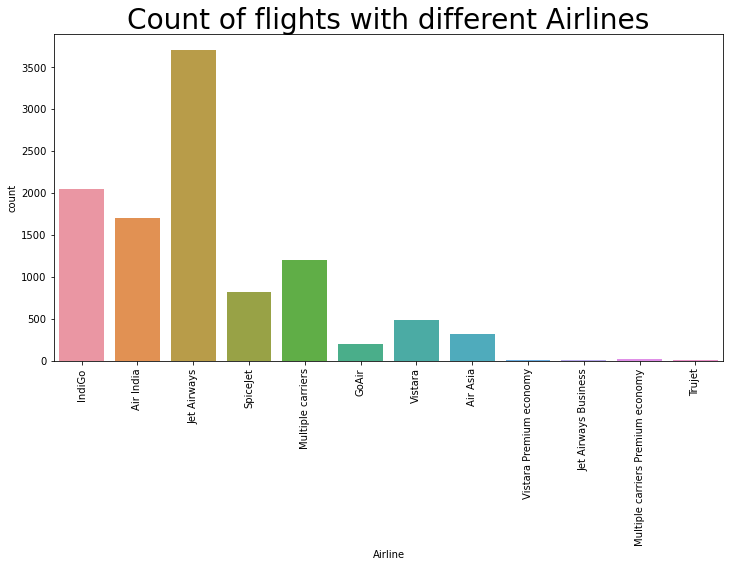

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [98]:
# Let's try to plot the count of airlines

plt.figure(figsize=(12,6))
sns.countplot(df_train['Airline'])
plt.title('Count of flights with different Airlines', size=28)
plt.xticks(rotation=90)
plt.show()
df_train["Airline"].value_counts()

In [99]:
# from the Uni-variant analysis of Airline we observe that the highly preferred plane for travelling is Jet Airways and 
# least preferred id Trujet
# Airline column has 12 unique values - 'IndiGo' , 'Air India', 'Jet Airways' , 'SpiceJet' , 'Multiple carriers' , 'GoAir', 'Vistara', 'Air Asia',
# 'Vistara Premium economy' , 'Jet Airways Business', 'Multiple carriers Premium economy', 'Trujet'.

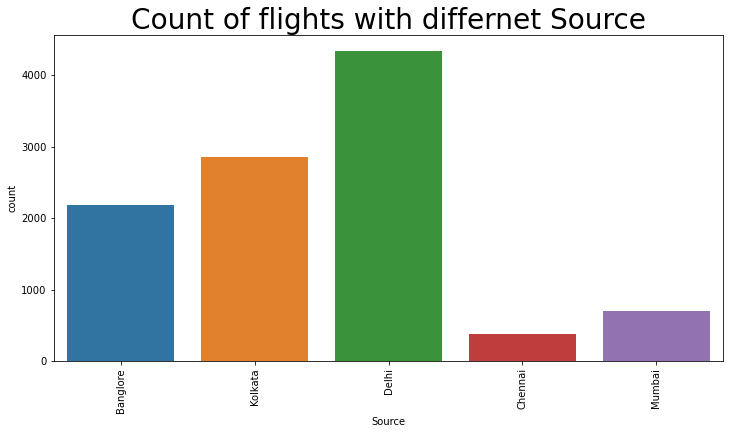

Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [100]:
# Let's try to plot the count of Source

plt.figure(figsize=(12,6))
sns.countplot(df_train['Source'])
plt.title('Count of flights with differnet Source', size=28)
plt.xticks(rotation=90)
plt.show()
df_train["Source"].value_counts()

In [101]:
# Source column has 5 unique values – ‘Bangalore’, ‘Kolkata’, ‘Chennai’, ‘Delhi’ and ‘Mumbai’.
# From here we can infer that the major planes in training set has Delhi as the source meaning the plane starts at Delhi
# and its count is 4345
# Planes starting from Chennai are only 381
# Maximum planes start from Delhi and least no. of planes start from Chennai

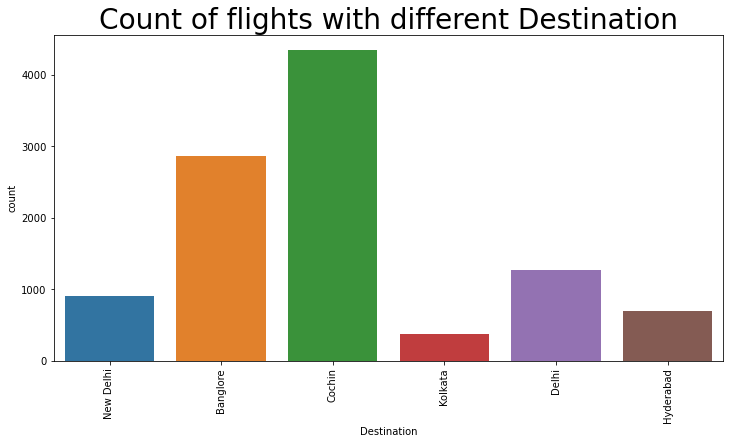

Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [102]:
# Let's try to plot the count of Destination

plt.figure(figsize=(12,6))
sns.countplot(df_train['Destination'])
plt.title('Count of flights with different Destination', size=28)
plt.xticks(rotation=90)
plt.show()
df_train["Destination"].value_counts()

In [103]:
# Destination column has 6 unique values - 'New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi' , 'Hyderabad'.
# From here we can infer that the major planes in training set has Cochin as the destination meaning the plane ends at Cochin
# and its count is 4345
# Planes ending at Kolkata are only 381
# Maximum planes end journey at Cochin and least no. of planes end at Kolkata

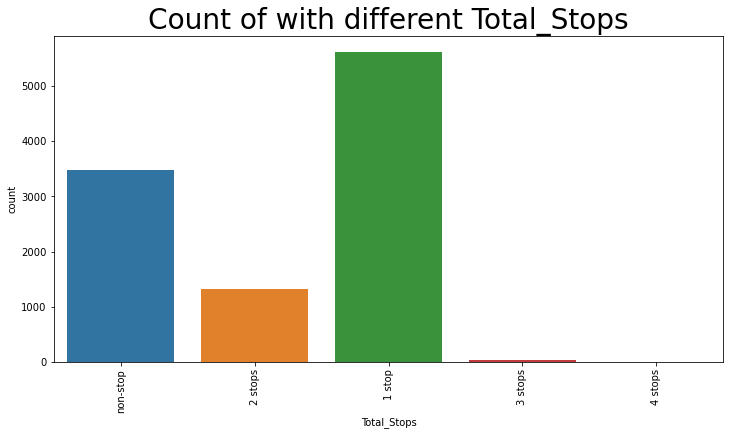

1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: Total_Stops, dtype: int64

In [104]:
# Let's try to plot the count of Total_Stops

plt.figure(figsize=(12,6))
sns.countplot(df_train['Total_Stops'])
plt.title('Count of with different Total_Stops', size=28)
plt.xticks(rotation=90)
plt.show()
df_train["Total_Stops"].value_counts()

In [105]:
# Total_Stops have 5 unique values "1 stop", "non-stop", "2 stops", "3 stops" and "4 stops".
# Planes with only one stop between the source and destination for training set is 5625
# Non-stop planes are 3475 in number
# Planes with two stops between the source and destination for training set is 1318
# Planes with three stops between the source and destination for training set is 43
# Planes with four stops between the source and destination for training set is only 1
# So majority of planes are one stop planes
# Only 1 plane is training set has 4 stops in between the journey.

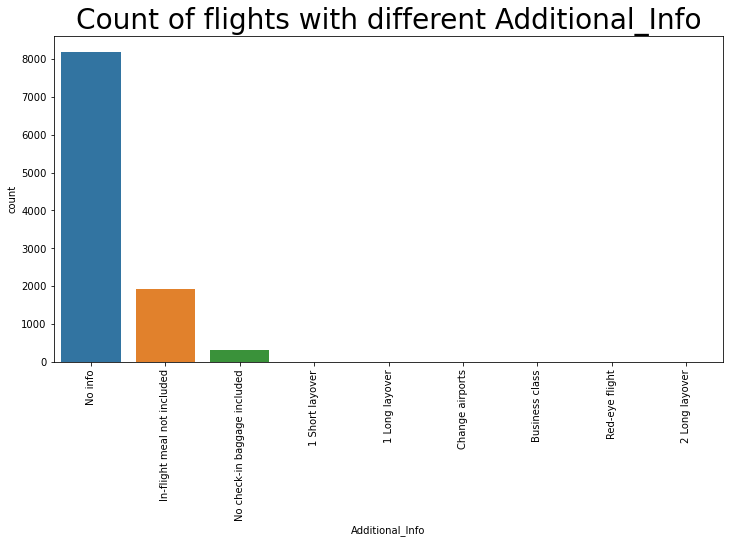

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [106]:
# Let's try to plot the count of Additional_Info

plt.figure(figsize=(12,6))
sns.countplot(df_train['Additional_Info'])
plt.title('Count of flights with different Additional_Info', size=28)
plt.xticks(rotation=90)
plt.show()
df_train["Additional_Info"].value_counts()

In [107]:
# Additional info column has 10 unique values - 'No info', 'In-flight meal not included', 'No check-in baggage included', 
# '1 Short layover' , 'No Info', '1 Long layover', 'Change airports' , 'Business class', 'Red-eye flight' , '2 Long layover'.
# We see that no info is displayed major no. of times(8185)
# 2 Long layover, 1 Short layover and Red-eye flight values in Additional Info column is displayed once

Before further analysis let's first change our columns into model understandable format



# Feature Engineering

In [108]:
# Treating the Route column in training and testing set so that the values are easily understandable by the models


In [109]:
df_train.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [110]:
#  Since the maximum number of stops is 4, there should be maximum 6 cities in any particular route. 
# This is how we can draw info from the Total_Stops column

In [111]:
# Route and Total Stops doing same thing 
# From Route we will come to know the number of stops
df_train["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10462, dtype: object

In [112]:
# So just 2 cities mentioned in route value it means non stop plane from Total_Stop column
# 3 cities mentioned in route value it means 1 stop plane from Total_Stop column
# 4 cities mentioned in route value it means 2 stops plane from Total_Stop column
# 5 cities mentioned in route value it means 3 stops plane from Total_Stop column
# 6 cities mentioned in route value it means 4 stops plane from Total_Stop column

In [113]:
#  So since Total_Stops gives us same info as that of the Route column, let's drop the column Route

df_train.drop(['Route'],axis=1,inplace = True)

In [114]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [115]:
# We can observe now from the training set that we have dropped the column Route

In [116]:
df_test.Total_Stops.unique()

array(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'],
      dtype=object)

In [117]:
#  So since Total_Stops gives us same info as that of the Route column even in testing set, let's drop the column Route

df_test.drop(['Route'],axis=1,inplace = True)

In [118]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [119]:
# We can observe now from the testing set that we have dropped the column Route

In [120]:
# Let's treat Date of Journey now

In [121]:
# Splitting the values to separate date, month and year in training set
df_train["Date_of_Journey"] = df_train['Date_of_Journey'].str.split("/")

In [122]:
df_train["Date_of_Journey"]

0        [24, 03, 2019]
1         [1, 05, 2019]
2         [9, 06, 2019]
3        [12, 05, 2019]
4        [01, 03, 2019]
              ...      
10678     [9, 04, 2019]
10679    [27, 04, 2019]
10680    [27, 04, 2019]
10681    [01, 03, 2019]
10682     [9, 05, 2019]
Name: Date_of_Journey, Length: 10462, dtype: object

In [123]:
# Now we can create 2 different columns to extract and store the values of date and month separately from Date_of_Journey.

In [124]:
df_train['Date'] = df_train.Date_of_Journey.str[0].astype(int)
df_train['Month'] = df_train.Date_of_Journey.str[1].astype(int)


In [125]:
df_train

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,"[24, 03, 2019]",Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,"[1, 05, 2019]",Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,"[9, 06, 2019]",Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,"[01, 03, 2019]",Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,"[9, 04, 2019]",Kolkata,Banglore,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,"[27, 04, 2019]",Kolkata,Banglore,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,"[27, 04, 2019]",Banglore,Delhi,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,"[01, 03, 2019]",Banglore,New Delhi,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [126]:
# We see that Date and month columns are created

In [127]:
# Splitting the values to separate date, month and year in testing set
df_test["Date_of_Journey"] = df_test['Date_of_Journey'].str.split("/")

In [128]:
df_test["Date_of_Journey"]

0        [6, 06, 2019]
1       [12, 05, 2019]
2       [21, 05, 2019]
3       [21, 05, 2019]
4       [24, 06, 2019]
             ...      
2666     [6, 06, 2019]
2667    [27, 03, 2019]
2668     [6, 03, 2019]
2669     [6, 03, 2019]
2670    [15, 06, 2019]
Name: Date_of_Journey, Length: 2645, dtype: object

In [129]:
# Now we can create 2 different columns to extract and store the values of date and month separately from Date_of_Journey.

In [130]:
df_test['Date'] = df_test.Date_of_Journey.str[0].astype(int)
df_test['Month'] = df_test.Date_of_Journey.str[1].astype(int)


In [131]:
df_test

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,Jet Airways,"[6, 06, 2019]",Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,"[12, 05, 2019]",Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,"[21, 05, 2019]",Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,"[21, 05, 2019]",Delhi,Cochin,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,"[24, 06, 2019]",Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,"[6, 06, 2019]",Kolkata,Banglore,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,"[27, 03, 2019]",Kolkata,Banglore,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,"[6, 03, 2019]",Delhi,Cochin,21:50,04:25 07 Mar,6h 35m,1 stop,No info,6,3
2669,Air India,"[6, 03, 2019]",Delhi,Cochin,04:00,19:15,15h 15m,1 stop,No info,6,3


In [132]:
# We see that Date and month columns are created for testing set

In [133]:
# So now let's drop Date_of_Journey from training and test set

df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

df_test.drop(['Date_of_Journey'],axis=1,inplace=True)

In [134]:

df_test.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Date,Month
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,4h,1 stop,No info,12,5
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6


In [135]:
df_train.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [136]:
# We have successfully dropped Date_of_Journey from both training and testing set.

In [137]:
# Treating the columns departure time and arrival time for our training set

# Dep_Time
df_train["Dep_hour"] = pd.to_datetime(df_train["Dep_Time"]).dt.hour
df_train["Dep_min"] = pd.to_datetime(df_train["Dep_Time"]).dt.minute
df_train.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour
df_train["Arrival_min"] = pd.to_datetime(df_train.Arrival_Time).dt.minute
df_train.drop(["Arrival_Time"], axis = 1, inplace = True)


# Treating the columns departure time and arrival time for our testing set

# Dep_Time
df_test["Dep_hour"] = pd.to_datetime(df_test["Dep_Time"]).dt.hour
df_test["Dep_min"] = pd.to_datetime(df_test["Dep_Time"]).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_min"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(["Arrival_Time"], axis = 1, inplace = True)

In [138]:
df_train.head(),df_test.head()

(       Airline    Source Destination Duration Total_Stops Additional_Info  \
 0       IndiGo  Banglore   New Delhi   2h 50m    non-stop         No info   
 1    Air India   Kolkata    Banglore   7h 25m     2 stops         No info   
 2  Jet Airways     Delhi      Cochin      19h     2 stops         No info   
 3       IndiGo   Kolkata    Banglore   5h 25m      1 stop         No info   
 4       IndiGo  Banglore   New Delhi   4h 45m      1 stop         No info   
 
    Price  Date  Month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  
 0   3897    24      3        22       20             1           10  
 1   7662     1      5         5       50            13           15  
 2  13882     9      6         9       25             4           25  
 3   6218    12      5        18        5            23           30  
 4  13302     1      3        16       50            21           35  ,
              Airline    Source Destination Duration Total_Stops  \
 0        Jet Airways     Delhi    

In [139]:
# From here we can observe that we have successfully created "Dep_hour", "Dep_min", "Arrival_hour", "Arrival_min" for both
# training and testing set and have successfully dropped column Dep_Time and Arrival_Time

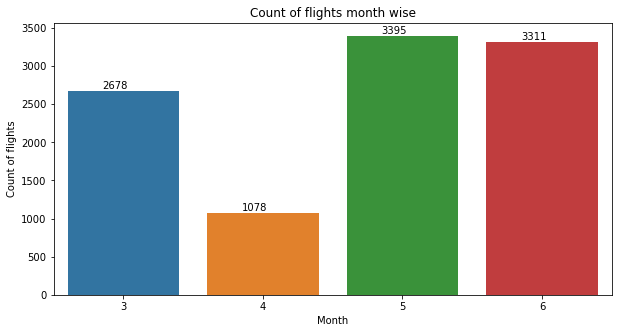

In [140]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Month', data = df_train)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',
                    color= 'black')

In [141]:
# The info that we can infer from here is that in the 5th month we have greater no. of flights flying with count 3395
# Next highest would be the next month to 5th month ie., 6th month and the count for 6th month is 3311
# Least no. of flights is in the 4th month hence the demand is less here and hence prize would be less comparatively
# When the demand increases the prize also increases.

In [142]:
# Treating the Total_Stops column
df_train['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
df_test['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [143]:
df_train['Total_Stops'].head(), df_test['Total_Stops'].head()

(0    0
 1    2
 2    2
 3    1
 4    1
 Name: Total_Stops, dtype: int64,
 0    1
 1    1
 2    1
 3    1
 4    0
 Name: Total_Stops, dtype: int64)

In [144]:
# The values are correctly encoded for the column Total_Stops for both training and testing set

In [145]:
# Treating the duration column for training set

df_train['Duration'] = df_train['Duration'].str.split(' ')




In [146]:
df_train['Duration']

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10462, dtype: object

In [147]:
# We observe that its split, now let's store hours and minutes in separate columns

In [148]:
df_train['Travel_hours'] = df_train['Duration'].str[0]
df_train['Travel_hours']

0         2h
1         7h
2        19h
3         5h
4         4h
        ... 
10678     2h
10679     2h
10680     3h
10681     2h
10682     8h
Name: Travel_hours, Length: 10462, dtype: object

In [149]:
# Now that we need to remove 'h' from the value in Travel hour column

# So let's again split and extract only the required part of data
df_train["Travel_hours"] = df_train['Travel_hours'].str.split('h')
df_train["Travel_hours"] = df_train['Travel_hours'].str[0]

In [150]:
df_train["Travel_hours"]

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Travel_hours, Length: 10462, dtype: object

In [151]:
# We have successfully extracted the hours from duration and stored in Travel_hours

In [152]:
# Lets perform the same above process to extract the travel minutes

In [153]:
df_train['Travel_minutes'] = df_train['Duration'].str[1]
df_train['Travel_minutes']

0        50m
1        25m
2        NaN
3        25m
4        45m
        ... 
10678    30m
10679    35m
10680    NaN
10681    40m
10682    20m
Name: Travel_minutes, Length: 10462, dtype: object

In [154]:
# Now that we need to remove 'm' from the value in Travel minutes column

# So let's again split and extract only the required part of data
df_train["Travel_minutes"] = df_train['Travel_minutes'].str.split('m')
df_train["Travel_minutes"] = df_train['Travel_minutes'].str[0]

In [155]:
df_train["Travel_minutes"]

0         50
1         25
2        NaN
3         25
4         45
        ... 
10678     30
10679     35
10680    NaN
10681     40
10682     20
Name: Travel_minutes, Length: 10462, dtype: object

In [156]:
# We have successfully extracted the minutes from duration and stored in Travel_minutes

In [157]:
# Now that we have extracted useful info from  Duration columns and have created two separate Travel_hour and travel_minute
# column, we can drop Duration from our testing set

In [158]:
df_train.drop(['Duration'],axis=1,inplace=True)

In [159]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


In [160]:
# Successfully dropped Duration and have created Travel_hours and minutes columns

In [161]:
# Treating the duration column for testing set

df_test['Duration'] = df_test['Duration'].str.split(' ')


In [162]:
df_test['Duration']

0       [10h, 55m]
1             [4h]
2       [23h, 45m]
3            [13h]
4        [2h, 50m]
           ...    
2666    [23h, 55m]
2667     [2h, 35m]
2668     [6h, 35m]
2669    [15h, 15m]
2670    [14h, 20m]
Name: Duration, Length: 2645, dtype: object

In [163]:
# We observe that its split, now let's store hours and minutes in separate columns

In [164]:
df_test['Travel_hours'] = df_test['Duration'].str[0]
df_test['Travel_hours']

0       10h
1        4h
2       23h
3       13h
4        2h
       ... 
2666    23h
2667     2h
2668     6h
2669    15h
2670    14h
Name: Travel_hours, Length: 2645, dtype: object

In [165]:
# Now that we need to remove 'h' from the value in Travel hour column

# So let's again split and extract only the required part of data
df_test["Travel_hours"] = df_test['Travel_hours'].str.split('h')
df_test["Travel_hours"] = df_test['Travel_hours'].str[0]

In [166]:
df_test["Travel_hours"]

0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Travel_hours, Length: 2645, dtype: object

In [167]:
# We have successfully extracted the hours from duration and stored in Travel_hours for our testing set

In [168]:
# Lets perform the same above process to extract the travel minutes

In [169]:
df_test['Travel_minutes'] = df_test['Duration'].str[1]
df_test['Travel_minutes']

0       55m
1       NaN
2       45m
3       NaN
4       50m
       ... 
2666    55m
2667    35m
2668    35m
2669    15m
2670    20m
Name: Travel_minutes, Length: 2645, dtype: object

In [170]:
# Now that we need to remove 'm' from the value in Travel minutes column

# So let's again split and extract only the required part of data
df_test["Travel_minutes"] = df_test['Travel_minutes'].str.split('m')
df_test["Travel_minutes"] = df_test['Travel_minutes'].str[0]

In [171]:
df_test["Travel_minutes"]

0        55
1       NaN
2        45
3       NaN
4        50
       ... 
2666     55
2667     35
2668     35
2669     15
2670     20
Name: Travel_minutes, Length: 2645, dtype: object

In [172]:
# We have successfully extracted the minutes from duration and stored in Travel_minutes

In [173]:
# Now that we have extracted useful info from  Duration columns and have created two separate Travel_hour and travel_minute
# column, we can drop Duration from our testing set

df_test.drop(['Duration'],axis=1,inplace=True)

In [174]:
df_test.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
0,Jet Airways,Delhi,Cochin,1,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,1,No info,12,5,6,20,10,20,4,NaN
2,Jet Airways,Delhi,Cochin,1,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,1,No info,21,5,8,0,21,0,13,NaN
4,Air Asia,Banglore,Delhi,0,No info,24,6,23,55,2,45,2,50


In [175]:
# Since we have introduced additional columns we will have many Nan values let's check and treat them

In [176]:
df_train.isnull().sum()

Airline               0
Source                0
Destination           0
Total_Stops           0
Additional_Info       0
Price                 0
Date                  0
Month                 0
Dep_hour              0
Dep_min               0
Arrival_hour          0
Arrival_min           0
Travel_hours          0
Travel_minutes     1006
dtype: int64

In [177]:
# We need to replace missing values in ‘Travel_mins’ as 0, 
# since the missing values represent that the travel time was in terms on hours only, and no additional minutes.

df_train["Travel_minutes"].fillna(0,inplace = True)


In [178]:
df_train.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Travel_hours       0
Travel_minutes     0
dtype: int64

In [179]:
# Missing values treated for training set

In [180]:
df_test.isnull().sum()

Airline              0
Source               0
Destination          0
Total_Stops          0
Additional_Info      0
Date                 0
Month                0
Dep_hour             0
Dep_min              0
Arrival_hour         0
Arrival_min          0
Travel_hours         0
Travel_minutes     252
dtype: int64

In [181]:
# We need to replace missing values in ‘Travel_mins’ as 0, 
# since the missing values represent that the travel time was in terms on hours only, and no additional minutes.

df_test["Travel_minutes"].fillna(0,inplace = True)

In [182]:
df_test.isnull().sum()

Airline            0
Source             0
Destination        0
Total_Stops        0
Additional_Info    0
Date               0
Month              0
Dep_hour           0
Dep_min            0
Arrival_hour       0
Arrival_min        0
Travel_hours       0
Travel_minutes     0
dtype: int64

In [183]:
# Missing values treated in testing set

In [184]:
# Let's check the info now after we have treated the missing values

df_train.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Total_Stops      10462 non-null  int64 
 4   Additional_Info  10462 non-null  object
 5   Price            10462 non-null  int64 
 6   Date             10462 non-null  int32 
 7   Month            10462 non-null  int32 
 8   Dep_hour         10462 non-null  int64 
 9   Dep_min          10462 non-null  int64 
 10  Arrival_hour     10462 non-null  int64 
 11  Arrival_min      10462 non-null  int64 
 12  Travel_hours     10462 non-null  object
 13  Travel_minutes   10462 non-null  object
dtypes: int32(2), int64(6), object(6)
memory usage: 1.4+ MB


In [185]:
df_train['Travel_hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [186]:
# Before converting this column to int datatype, we need to replace the value 5m with 5

In [187]:
df_train['Travel_hours'].replace(['5m'],[5],inplace = True)

In [188]:
df_train['Travel_hours'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', 5, '41', '40'], dtype=object)

In [189]:
# So we have treated the issue and now we can convert Travel_hour to type int64

In [190]:
df_train['Travel_hours'] = df_train['Travel_hours'].astype('int64')

In [191]:
df_train['Travel_minutes'].unique()

array(['50', '25', 0, '45', '30', '5', '15', '35', '10', '20', '55', '40'],
      dtype=object)

In [192]:
df_train['Travel_minutes'] = df_train['Travel_minutes'].astype('int64')

In [193]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Source           10462 non-null  object
 2   Destination      10462 non-null  object
 3   Total_Stops      10462 non-null  int64 
 4   Additional_Info  10462 non-null  object
 5   Price            10462 non-null  int64 
 6   Date             10462 non-null  int32 
 7   Month            10462 non-null  int32 
 8   Dep_hour         10462 non-null  int64 
 9   Dep_min          10462 non-null  int64 
 10  Arrival_hour     10462 non-null  int64 
 11  Arrival_min      10462 non-null  int64 
 12  Travel_hours     10462 non-null  int64 
 13  Travel_minutes   10462 non-null  int64 
dtypes: int32(2), int64(8), object(4)
memory usage: 1.4+ MB


In [194]:
# All the numerical columns have integer datatype and now just the categorical columns are identified as object and will be 
# taken care when encoded

In [195]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Source           2645 non-null   object
 2   Destination      2645 non-null   object
 3   Total_Stops      2645 non-null   int64 
 4   Additional_Info  2645 non-null   object
 5   Date             2645 non-null   int32 
 6   Month            2645 non-null   int32 
 7   Dep_hour         2645 non-null   int64 
 8   Dep_min          2645 non-null   int64 
 9   Arrival_hour     2645 non-null   int64 
 10  Arrival_min      2645 non-null   int64 
 11  Travel_hours     2645 non-null   object
 12  Travel_minutes   2645 non-null   object
dtypes: int32(2), int64(5), object(6)
memory usage: 268.6+ KB


In [196]:
df_test['Travel_minutes'].unique()

array(['55', 0, '45', '50', '20', '5', '15', '40', '10', '35', '30', '25'],
      dtype=object)

In [197]:
df_test['Travel_hours'].unique()

array(['10', '4', '23', '13', '2', '18', '15', '5', '6', '28', '9', '17',
       '12', '14', '11', '25', '19', '7', '3', '1', '27', '26', '8', '21',
       '16', '22', '33', '24', '38', '20', '35', '31', '34', '29', '30',
       '37', '36', '39', '32', '40', '5m'], dtype=object)

In [198]:
df_test['Travel_hours'].replace(['5m'],[5],inplace = True)

In [199]:
df_test['Travel_minutes'] = df_test['Travel_minutes'].astype('int64')

In [200]:
df_test['Travel_hours'] = df_test['Travel_hours'].astype('int64')

In [201]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2645 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2645 non-null   object
 1   Source           2645 non-null   object
 2   Destination      2645 non-null   object
 3   Total_Stops      2645 non-null   int64 
 4   Additional_Info  2645 non-null   object
 5   Date             2645 non-null   int32 
 6   Month            2645 non-null   int32 
 7   Dep_hour         2645 non-null   int64 
 8   Dep_min          2645 non-null   int64 
 9   Arrival_hour     2645 non-null   int64 
 10  Arrival_min      2645 non-null   int64 
 11  Travel_hours     2645 non-null   int64 
 12  Travel_minutes   2645 non-null   int64 
dtypes: int32(2), int64(7), object(4)
memory usage: 268.6+ KB


In [202]:
# Except for categorical columns all are identified as int
# The datatype of categorical column will be taken care when encoded

In [203]:
# Creating the list of different types of columns

Categorical = ["Airline", "Source", "Destination", "Additional_Info"]
Numerical = ["Total_Stops", "Date", "Month", "Dep_hour","Dep_min","Arrival_hour","Arrival_min","Travel_hours","Travel_minutes"]

In [204]:
# Let's do further visualization and analysis

# Bi-Variant Analysis

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

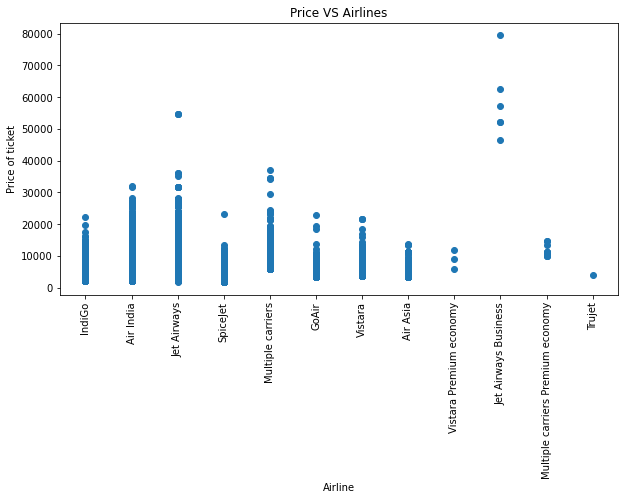

In [205]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Airlines')
plt.scatter(df_train['Airline'], df_train['Price'])
plt.xticks(rotation = 90)
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

We see that the prize for Jet Airways Business airline is high

In [206]:
# Count for Vistara Premium economy, Trujet, Multiple carries premium economy and Jet airways business is quite low.

# Airline
df_train["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

df_test["Airline"].replace({'Multiple carriers Premium economy':'Other', 
                                                        'Jet Airways Business':'Other',
                                                        'Vistara Premium economy':'Other',
                                                        'Trujet':'Other'
                                                   },    
                                        inplace=True)

Text(0, 0.5, 'Price of ticket')

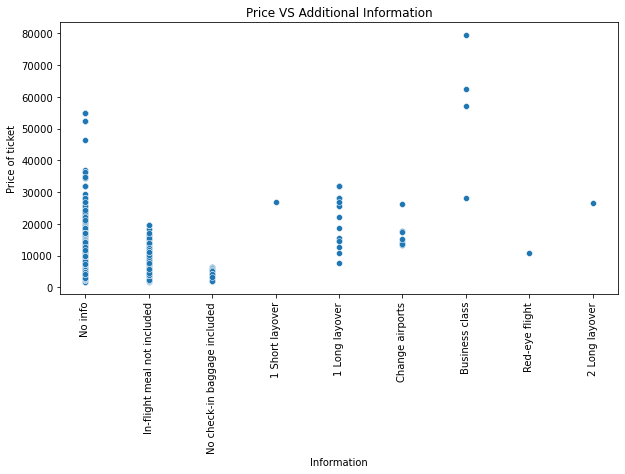

In [207]:
plt.figure(figsize = (10, 5))
plt.title('Price VS Additional Information')
sns.scatterplot(df_train['Additional_Info'], df_train['Price'],data=df_train)
plt.xticks(rotation = 90)
plt.xlabel('Information')
plt.ylabel('Price of ticket')

From above scatter plot it is clear that the ticket prices for Business class is higher which is quite obivious.

In [208]:
df_train["Additional_Info"].value_counts()

No info                         8185
In-flight meal not included     1926
No check-in baggage included     318
1 Long layover                    19
Change airports                    7
Business class                     4
Red-eye flight                     1
1 Short layover                    1
2 Long layover                     1
Name: Additional_Info, dtype: int64

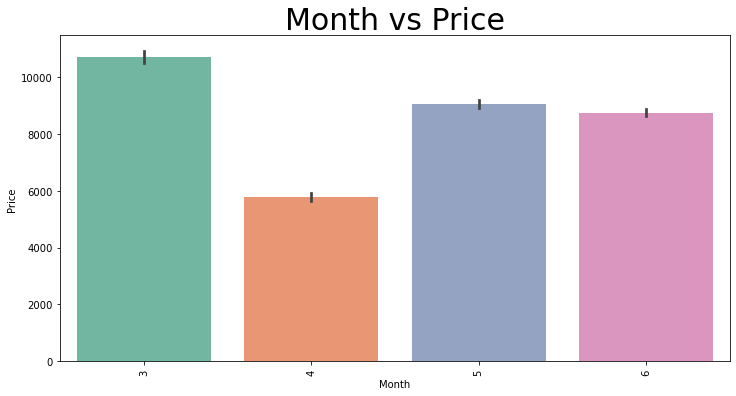

In [209]:
plt.figure(figsize=(12,6))
sns.barplot(df_train['Month'], df_train['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

People tend to travel less in April
- Flights in May and June have a higher count, seems like people travel during holiday months

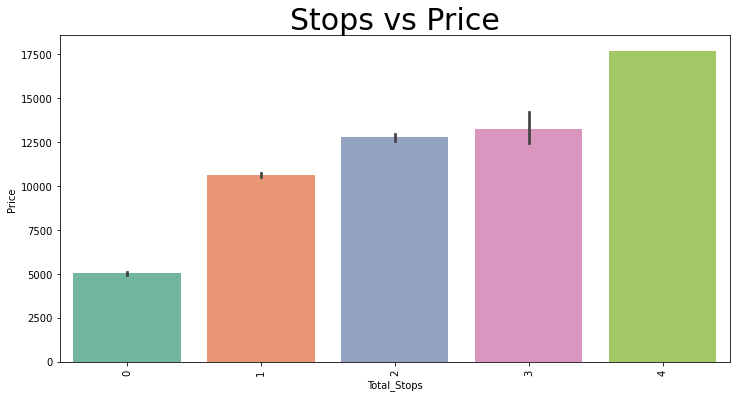

In [210]:
plt.figure(figsize=(12,6))
sns.barplot(df_train['Total_Stops'], df_train['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [211]:
# Higher the stops higher the price

<AxesSubplot:xlabel='Total_Stops', ylabel='Density'>

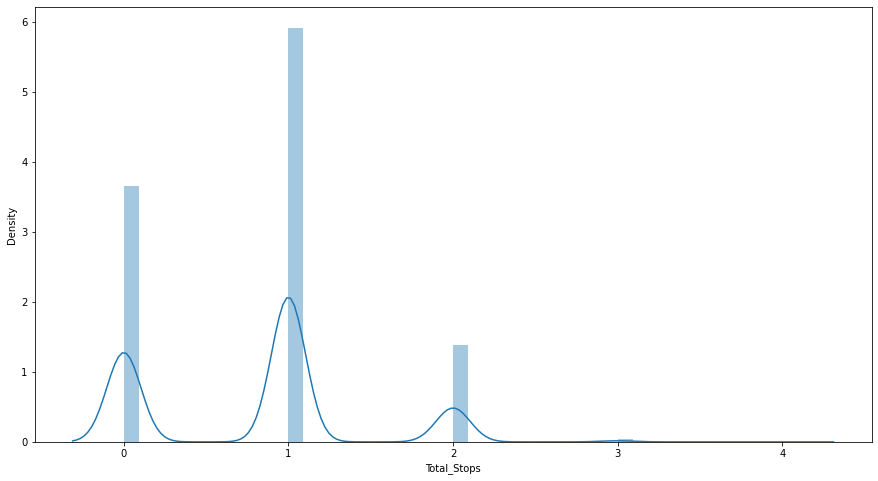

In [212]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['Total_Stops'])

 We can infer that majority of the flights have stops as 1, flights with 3 and 4 stops are quite low

<AxesSubplot:xlabel='Date', ylabel='Density'>

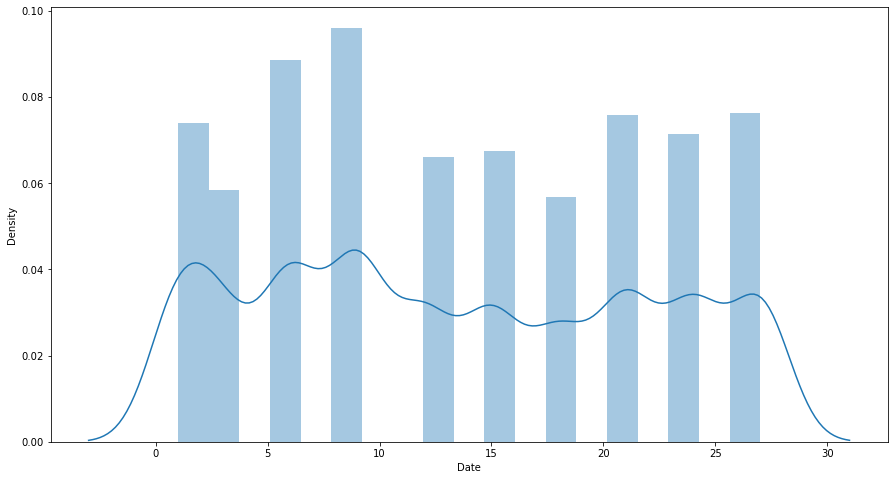

In [213]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['Date'])

There are no specific dates when the flights travel; the distribution is almost similar for all dates

<AxesSubplot:xlabel='Month', ylabel='Density'>

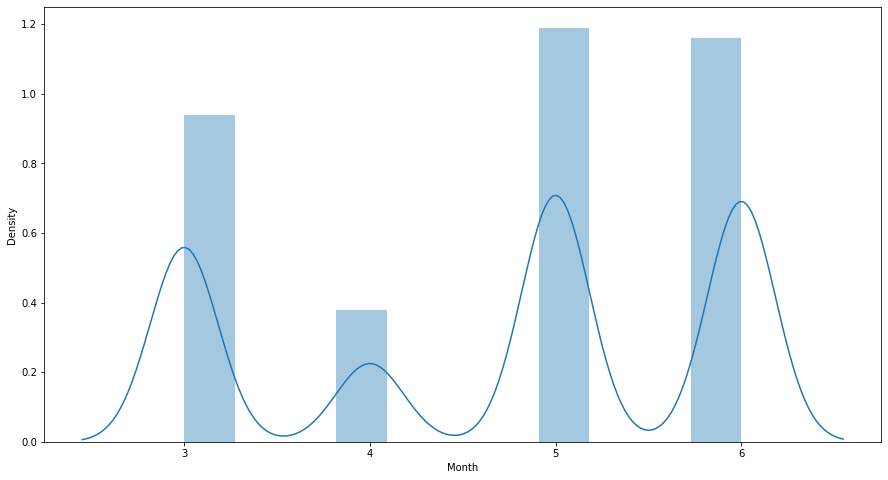

In [214]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['Month'])

People tend to travel less in April
- Flights in May and June have a higher count, seems like people travel during holiday months

<AxesSubplot:xlabel='Dep_hour', ylabel='Density'>

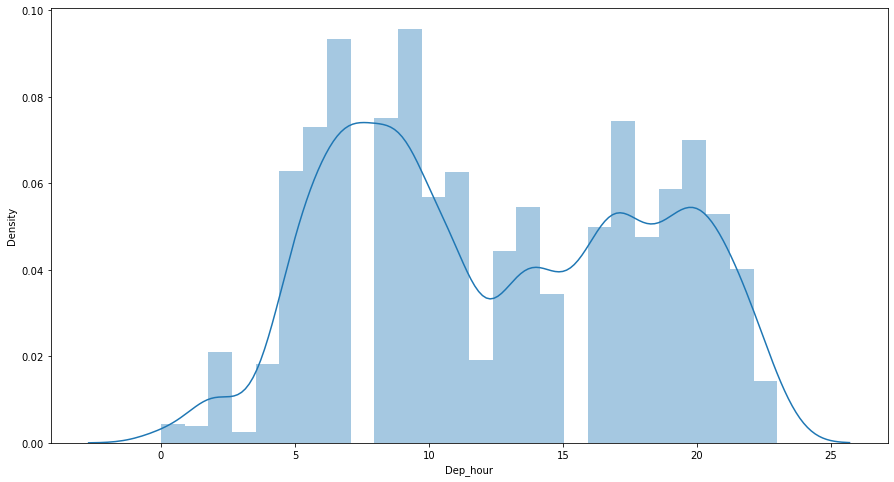

In [215]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['Dep_hour'])

Majority of the flights tend to fly in the early morning time
Count of flights taking off during 16:00 - 23:00 is also high, Afternoon flights are less in number.

<AxesSubplot:xlabel='Dep_min', ylabel='Density'>

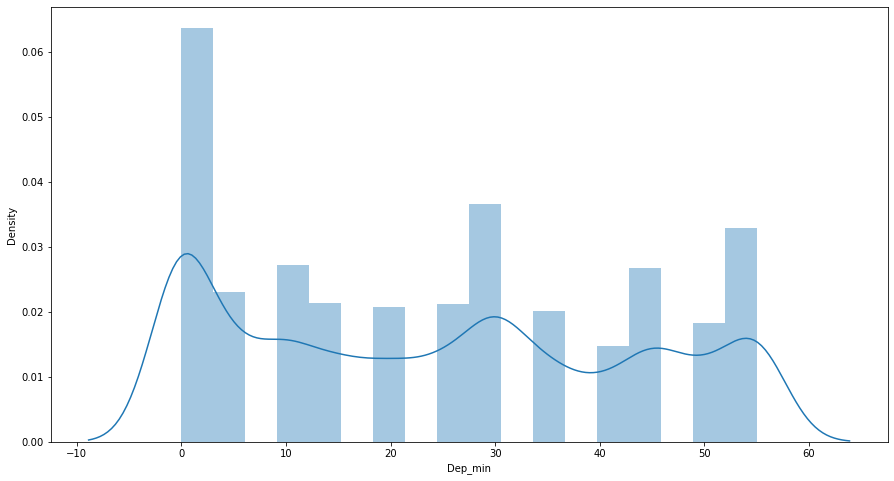

In [216]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['Dep_min'])

Most flights take off at whole hours (Mins as 00)

In [217]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


<AxesSubplot:xlabel='Arrival_hour', ylabel='Density'>

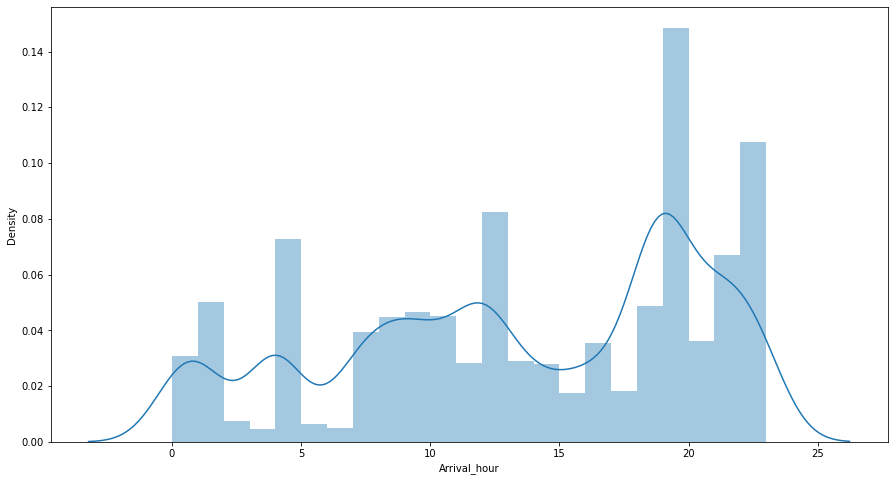

In [218]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['Arrival_hour'])

Majority of the flights reach its destination in the evening time around 18:00-19:00
This seems to be because majority of the flights have take-off times in the morning and hence land after in the evening

<AxesSubplot:xlabel='Arrival_min', ylabel='Density'>

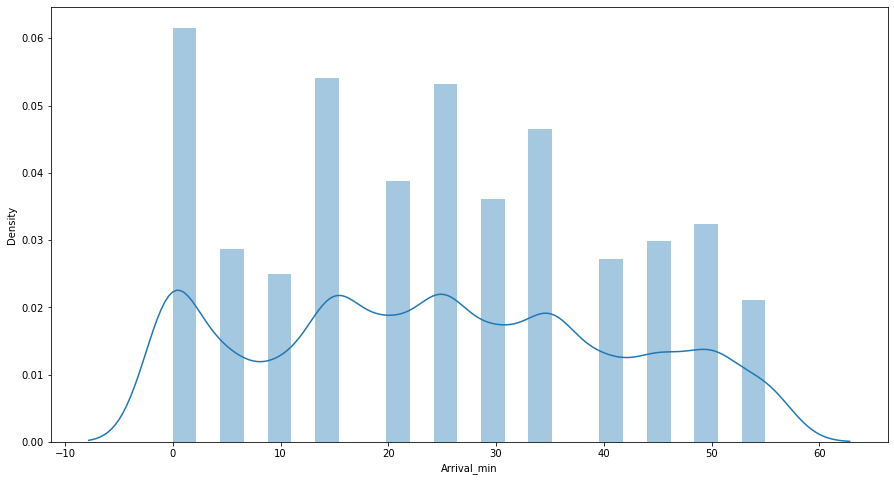

In [219]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['Arrival_min'])

Info from here is that, distribution is similar and does not give out any information for predictions

<AxesSubplot:xlabel='Travel_hours', ylabel='Density'>

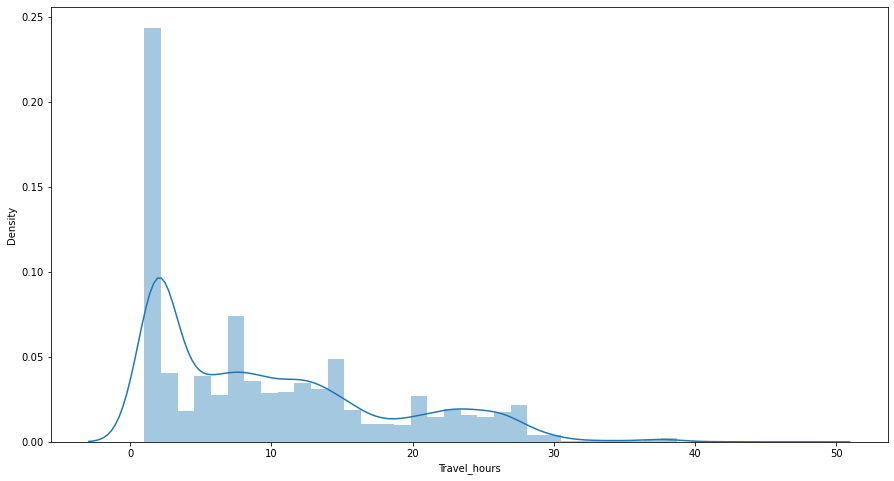

In [220]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['Travel_hours'])

Majority of the flights have travel time for around 2-3 hours, which seems ok since these are domestic flights
Some flights have time around 30 hours too, this could be because of the number of stops in between

<AxesSubplot:xlabel='Travel_minutes', ylabel='Density'>

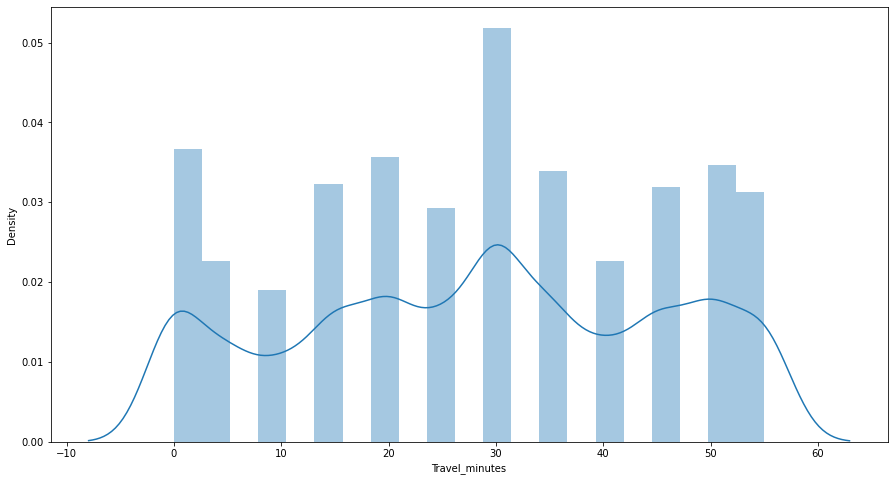

In [221]:
plt.figure(figsize=(15,8))
sns.distplot(df_train['Travel_minutes'])

The data is divided and is not pointing towards any specific points

<AxesSubplot:xlabel='Price', ylabel='Density'>

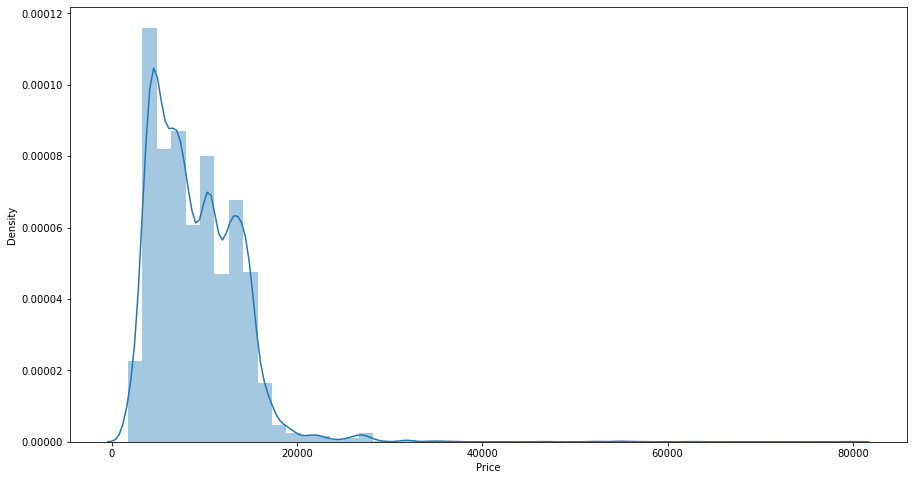

In [222]:
# Let's check the distribution of our target column Price
plt.figure(figsize=(15,8))
sns.distplot(df_train['Price'])

In [223]:
df_train['Price'].min()

1759

In [224]:
df_train['Price'].max()

79512

The minimum value of flight price is 1759 and the maximum value is 79512

Majority of the flights have price range between 1759–20k, and number of flights having prices greater than 20k are quite less. Price range is skewed towards right

In [225]:
# Converting the categorical column of training set into numeric

from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for i in Categorical:   
    df_train[i] = encoder.fit_transform(df_train[i]) 
df_train.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int64
Additional_Info    int32
Price              int64
Date               int32
Month              int32
Dep_hour           int64
Dep_min            int64
Arrival_hour       int64
Arrival_min        int64
Travel_hours       int64
Travel_minutes     int64
dtype: object

In [226]:
# Converting the categorical column of testing set into numeric

from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
for i in Categorical:   
    df_test[i] = encoder.fit_transform(df_test[i]) 
df_test.dtypes

Airline            int32
Source             int32
Destination        int32
Total_Stops        int64
Additional_Info    int32
Date               int32
Month              int32
Dep_hour           int64
Dep_min            int64
Arrival_hour       int64
Arrival_min        int64
Travel_hours       int64
Travel_minutes     int64
dtype: object

In [227]:
# Both training and testing sets categorical columns are converted to numeric

In [228]:
df_train.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
0,3,0,5,0,7,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,7,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,7,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,7,13302,1,3,16,50,21,35,4,45


In [229]:
# Categorical columns are converted to numericD

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0, 0.5, 'Airline'),
  Text(0, 1.5, 'Source'),
  Text(0, 2.5, 'Destination'),
  Text(0, 3.5, 'Total_Stops'),
  Text(0, 4.5, 'Additional_Info'),
  Text(0, 5.5, 'Price'),
  Text(0, 6.5, 'Date'),
  Text(0, 7.5, 'Month'),
  Text(0, 8.5, 'Dep_hour'),
  Text(0, 9.5, 'Dep_min'),
  Text(0, 10.5, 'Arrival_hour'),
  Text(0, 11.5, 'Arrival_min'),
  Text(0, 12.5, 'Travel_hours'),
  Text(0, 13.5, 'Travel_minutes')])

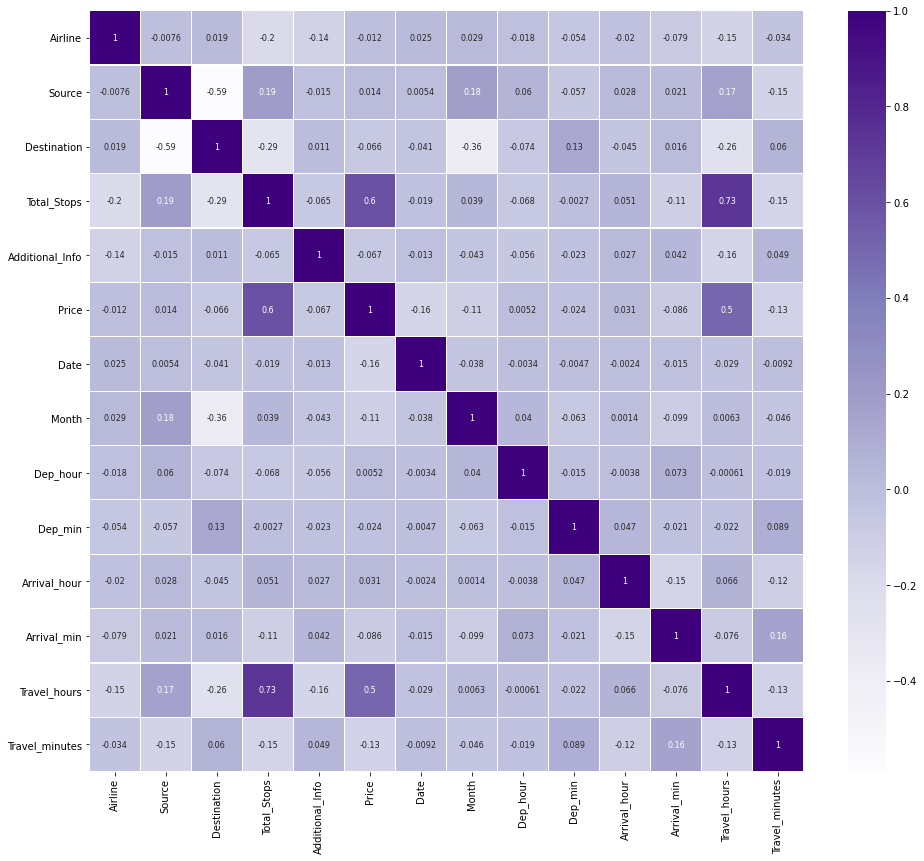

In [230]:
plt.figure(figsize=(16,14))
sns.heatmap(df_train.corr(),linewidths=.2,cmap="Purples", annot=True, annot_kws={"size": 8})
plt.yticks(rotation=0)

In [231]:
# From this heatmap we have got the correlation values and we can see that the column "Total_Stops" and "Travel_hours 
# has high positive correlation with the target column compared to all other columns
# So as the total_stops and travel_hours is higher, the prize of flight is higher
# The column "Dep_Hour" has weak correlation value(0.0052) with the target variable(not a very important factor because the 
# correlation value is close to zero)
# The columns with negative correlation with the target variable is "Airline", "Destination", "Additional_Info", "Date", "Month"
# "Dep_min", "Arrival_min" and "Travel_min"


In [232]:
cor = df_train.corr()
cor

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
Airline,1.000000,-0.007601,0.019186,-0.197675,-0.136903,-0.012320,0.024765,0.028988,-0.018023,-0.053672,-0.020115,-0.078770,-0.147052,-0.034452
Source,-0.007601,1.000000,-0.589992,0.194203,-0.015366,0.013796,0.005440,0.181072,0.060218,-0.056609,0.028257,0.021392,0.167158,-0.145517
Destination,0.019186,-0.589992,1.000000,-0.291763,0.011240,-0.065875,-0.040994,-0.362186,-0.074056,0.128523,-0.044605,0.016351,-0.255226,0.060499
Total_Stops,-0.197675,0.194203,-0.291763,1.000000,-0.064786,0.602013,-0.018937,0.039003,-0.067523,-0.002695,0.051476,-0.107099,0.730297,-0.150297
Additional_Info,-0.136903,-0.015366,0.011240,-0.064786,1.000000,-0.067204,-0.012851,-0.043314,-0.056168,-0.022805,0.026654,0.042249,-0.156113,0.049188
Price,-0.012320,0.013796,-0.065875,0.602013,-0.067204,1.000000,-0.159044,-0.113396,0.005155,-0.024155,0.031023,-0.086163,0.504329,-0.131709
Date,0.024765,0.005440,-0.040994,-0.018937,-0.012851,-0.159044,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086,-0.029434,-0.009219
Month,0.028988,0.181072,-0.362186,0.039003,-0.043314,-0.113396,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261,0.006327,-0.046281
Dep_hour,-0.018023,0.060218,-0.074056,-0.067523,-0.056168,0.005155,-0.003394,0.040406,1.000000,-0.015068,-0.003827,0.072989,-0.000613,-0.018859
Dep_min,-0.053672,-0.056609,0.128523,-0.002695,-0.022805,-0.024155,-0.004741,-0.062636,-0.015068,1.000000,0.046564,-0.021353,-0.022071,0.089227


In [233]:
# This is the correlation values for our dataset which we saw visually using the heatmap
# We can see that the Total_Stops and "Travel_hours" has high positive correlation with our target variable i.e., Price

In [234]:
# Representing which columns have positive and negative correlations with the target column

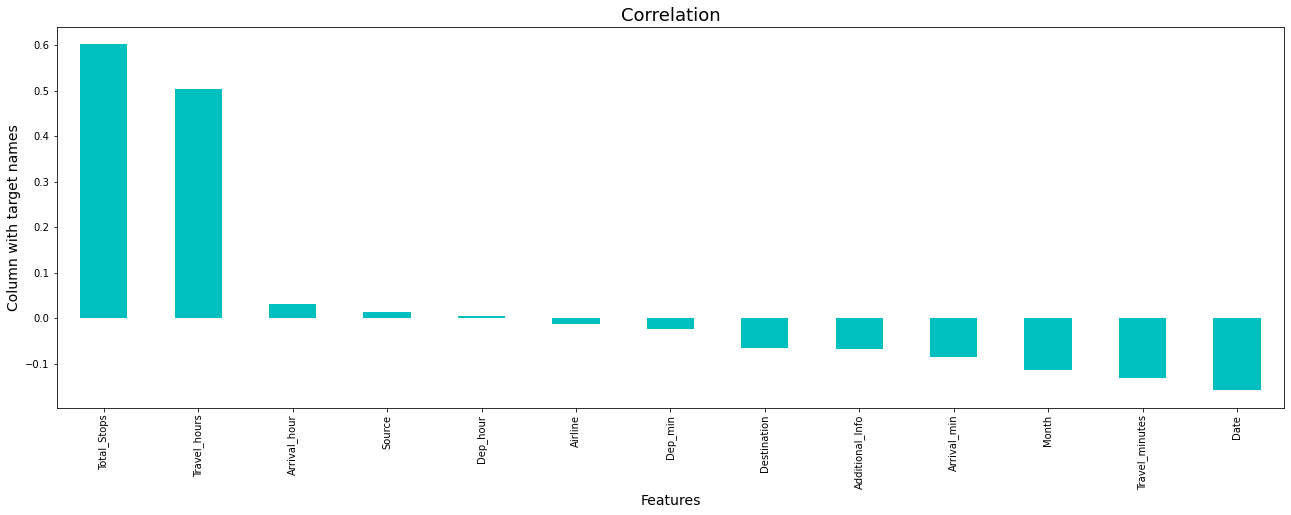

In [235]:
plt.figure(figsize=(22,7))
df_train.corr()['Price'].sort_values(ascending=False).drop(["Price"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [236]:
# Here we can infer that the columns "Total_Stops", "Travel_hours", "Arrival_hour", "Source" and "Dep_hour" are positively 
# correlated with our target column
# And the variables "Airline", "Dep_min", "Destination", "Additional_Info", "Arrival_min", "Month","Travel_min" and 
# "Date" are negatively correlated
# Total_Stops and Total_hours have high positive correlation i.e., 0.6 and 0.5 and are important features in prediction of 
# Price

Checking for the presence of outliers

In [237]:

# There is no need to check for skewness or the presence of outliers for categorical columns, so let's just check for numerical 
# column

<AxesSubplot:xlabel='Total_Stops'>

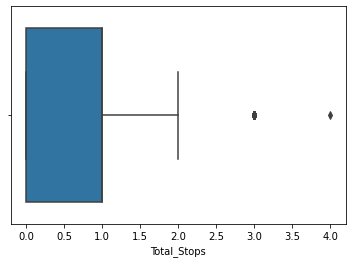

In [238]:
sns.boxplot(df_train['Total_Stops'])


<AxesSubplot:xlabel='Total_Stops'>

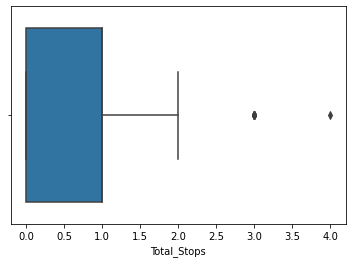

In [239]:
sns.boxplot(df_test['Total_Stops'])

In [240]:
# Presence of few outliers here

<AxesSubplot:xlabel='Price'>

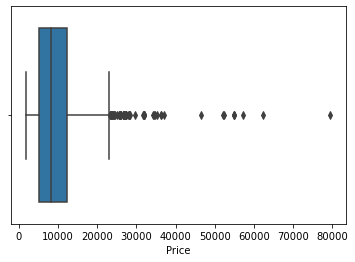

In [241]:
sns.boxplot(df_train['Price'])

In [242]:
# We see the presence of outliers and it needs to be treated

<AxesSubplot:xlabel='Date'>

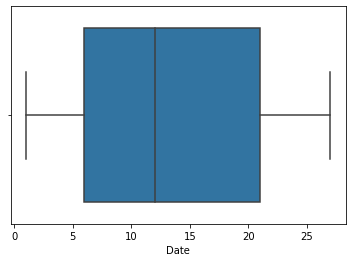

In [243]:
sns.boxplot(df_test['Date'])

In [244]:
# No outliers in testing set of Date column

<AxesSubplot:xlabel='Date'>

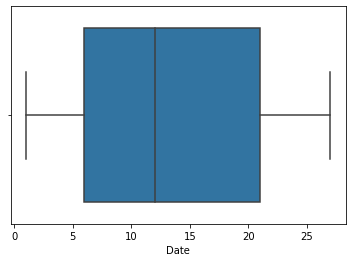

In [245]:
sns.boxplot(df_train['Date'])

In [246]:
# No outliers present

<AxesSubplot:xlabel='Month'>

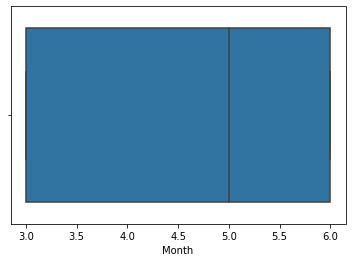

In [247]:
sns.boxplot(df_train['Month'])

In [248]:
# No outliers present

<AxesSubplot:xlabel='Dep_hour'>

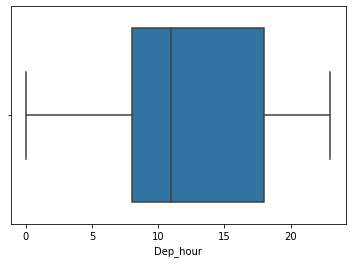

In [249]:
sns.boxplot(df_train['Dep_hour'])

In [250]:
# No outliers present

<AxesSubplot:xlabel='Dep_min'>

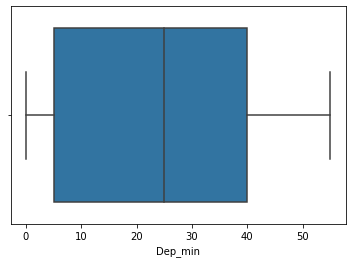

In [251]:
sns.boxplot(df_train['Dep_min'])

In [252]:
# No outliers present

<AxesSubplot:xlabel='Arrival_hour'>

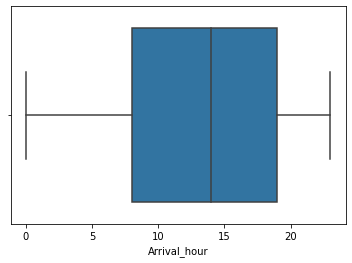

In [253]:
sns.boxplot(df_train['Arrival_hour'])

In [254]:
# No outliers present

<AxesSubplot:xlabel='Arrival_min'>

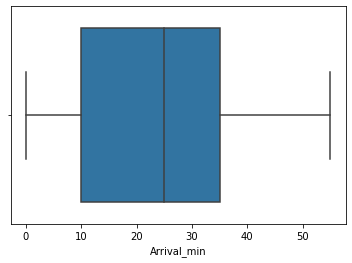

In [255]:
sns.boxplot(df_train['Arrival_min'])

In [256]:
# No outliers present

<AxesSubplot:xlabel='Travel_hours'>

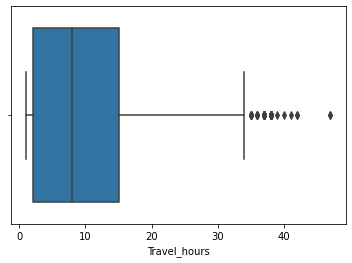

In [257]:
sns.boxplot(df_train['Travel_hours'])

In [258]:
# Presence of outliers, need to treat them

<AxesSubplot:xlabel='Travel_hours'>

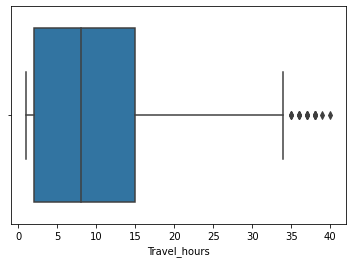

In [259]:
sns.boxplot(df_test['Travel_hours'])

In [260]:
# Presence of outliers, need to treat them

<AxesSubplot:xlabel='Travel_minutes'>

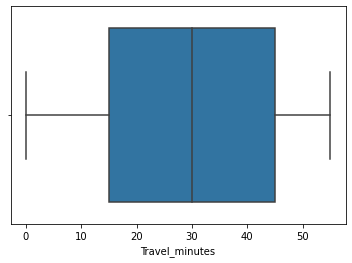

In [261]:
sns.boxplot(df_train['Travel_minutes'])

In [262]:
# No outliers present here

<AxesSubplot:xlabel='Travel_minutes'>

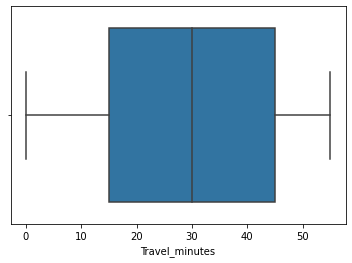

In [263]:
sns.boxplot(df_test['Travel_minutes'])

In [264]:
df_train.skew()

Airline            0.267279
Source            -0.419669
Destination        1.225081
Total_Stops        0.332309
Additional_Info   -2.138641
Price              1.857490
Date               0.124628
Month             -0.377535
Dep_hour           0.108306
Dep_min            0.171301
Arrival_hour      -0.378978
Arrival_min        0.110802
Travel_hours       0.892759
Travel_minutes    -0.085972
dtype: float64

In [265]:
# Need not consider the presence of skewness for categorical columns only need to check for continuous columns

In [266]:
# # We can see the presence of skewness in our data
# As we saw the presence of outliers and hence the skewness is present
# -(0.5) to +(0.5), the skewness within this range is acceptable
# We have skewness of few columns outside the above mentioned range and they need to be treated. 
# Skewness is present in Travel_hours and Price columns

In [267]:
df_test.skew()

Airline            0.242638
Source            -0.424718
Destination        1.260252
Total_Stops        0.329736
Additional_Info   -1.717307
Date               0.201535
Month             -0.400537
Dep_hour           0.089146
Dep_min            0.129932
Arrival_hour      -0.447350
Arrival_min        0.113229
Travel_hours       0.902392
Travel_minutes    -0.102548
dtype: float64

In [268]:
# # We can see the presence of skewness in our data
# As we saw the presence of outliers and hence the skewness is present
# -(0.5) to +(0.5), the skewness within this range is acceptable
# We have skewness of few columns outside the above mentioned range and they need to be treated. 
# Skewness is present in Travel_hours

# Considering to remove the outliers

In [269]:
df_train.shape

(10462, 14)

In [270]:
# So this is the shape of our dataset before removing the outliers
# We have 10462rows and 14 columns

In [271]:
from scipy.stats import zscore
z=np.abs(zscore(df_train))
threshold=3
np.where(z>3)

(array([  123,   226,   396,   402,   486,   510,   553,   597,   628,
          657,   784,   784,   825,   918,   935,   945,   958,   965,
          968,   974,  1042,  1065,  1111,  1194,  1216,  1244,  1339,
         1344,  1420,  1438,  1462,  1474,  1492,  1547,  1625,  1650,
         1653,  1661,  1705,  1778,  1784,  1797,  1909,  2044,  2068,
         2087,  2096,  2160,  2160,  2393,  2469,  2483,  2483,  2540,
         2543,  2543,  2604,  2609,  2619,  2621,  2627,  2640,  2677,
         2701,  2701,  2797,  2805,  2864,  2904,  2904,  3010,  3010,
         3088,  3088,  3132,  3195,  3231,  3290,  3372,  3466,  3505,
         3505,  3538,  3554,  3667,  3667,  3753,  3755,  3780,  3780,
         3908,  3929,  3974,  4008,  4078,  4078,  4418,  4418,  4476,
         4476,  4606,  4606,  4627,  4710,  4779,  4960,  4960,  4995,
         5080,  5312,  5312,  5378,  5384,  5451,  5563,  5597,  5636,
         5636,  5645,  5646,  5654,  5673,  5680,  5717,  5773,  5789,
      

In [272]:
df_train_new_z=df_train[(z<3).all(axis=1)] 
df_train_new_z

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
0,3,0,5,0,7,3897,24,3,22,20,1,10,2,50
1,1,3,0,2,7,7662,1,5,5,50,13,15,7,25
2,4,2,1,2,7,13882,9,6,9,25,4,25,19,0
3,3,3,0,1,7,6218,12,5,18,5,23,30,5,25
4,3,0,5,1,7,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,7,4107,9,4,19,55,22,25,2,30
10679,1,3,0,0,7,4145,27,4,20,45,23,20,2,35
10680,4,0,2,0,7,7229,27,4,8,20,11,20,3,0
10681,8,0,5,0,7,12648,1,3,11,30,14,10,2,40


In [273]:
df_train_new_z.shape  # info of data after removing outliers

(10260, 14)

In [274]:
# Now that we can observe the row size of our dataset is reduced 
# Now we have 10260 rows present

In [275]:
# Calculating the percentage of data loss

In [276]:
Data_loss=((10462-10260)/10462)*100

In [277]:
Data_loss

1.9307971707130567

In [278]:
# So here we can see that we have lost nearly 2 % of data after removing the outliers and is acceptable

In [279]:
df_train_new_z.skew()   # skewness is reduced comparitively

Airline            0.267973
Source            -0.434962
Destination        1.247287
Total_Stops        0.233683
Additional_Info   -1.478361
Price              0.445447
Date               0.113286
Month             -0.409710
Dep_hour           0.096769
Dep_min            0.177779
Arrival_hour      -0.372100
Arrival_min        0.107219
Travel_hours       0.808975
Travel_minutes    -0.093034
dtype: float64

In [280]:
# Skewness is still present in Travel_hours, so let's use log transform on this

In [281]:
df_train_new_z['Travel_hours'] = np.log(df_train_new_z['Travel_hours'])

In [282]:
df_train_new_z['Travel_hours'].skew()

-0.2394874359784042

In [283]:
# Skewness is removed

In [284]:
df_train_new_z.describe() 

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
count,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000,10260.000000
mean,3.712183,1.968324,1.409747,0.783236,6.595029,8786.062573,13.585965,4.725536,12.529435,24.324074,13.358674,24.714425,1.852682,28.296296
std,1.917264,1.180333,1.452280,0.642723,0.784410,4048.453942,8.424196,1.153790,5.717239,18.768207,6.853216,16.604237,1.004965,16.912097
min,0.000000,0.000000,0.000000,0.000000,5.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,0.000000,7.000000,5198.000000,6.000000,4.000000,8.000000,5.000000,8.000000,10.000000,0.693147,15.000000
50%,4.000000,2.000000,1.000000,1.000000,7.000000,8052.000000,12.000000,5.000000,12.000000,25.000000,14.000000,25.000000,2.079442,30.000000
75%,4.000000,3.000000,2.000000,1.000000,7.000000,12192.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,2.708050,45.000000
max,8.000000,4.000000,5.000000,2.000000,8.000000,22798.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,3.555348,55.000000


In [285]:
# info on count,mean.std,min and max after dropping few columns, removing outliers and skewness

In [286]:
df_test.shape

(2645, 13)

In [287]:
# So this is the shape of our dataset before removing the outliers
# We have 2645 rows and 13 columns

In [288]:
from scipy.stats import zscore
z1=np.abs(zscore(df_test))
threshold=3
np.where(z1>3)

(array([  72,  251,  251,  483,  509,  672,  724,  785,  873,  875,  951,
        1017, 1263, 1271, 1371, 1502, 1544, 1676, 1679, 1679, 1769, 1789,
        1848, 1904, 1931, 2005, 2095, 2338, 2401, 2421, 2451, 2466, 2471],
       dtype=int64),
 array([ 3,  3, 11,  3, 11,  3,  3, 11,  3,  3,  4, 11, 11, 11, 11, 11, 11,
        11,  3, 11, 11,  4,  4, 11, 11,  3, 11, 11,  3,  3, 11,  3, 11],
       dtype=int64))

In [289]:
df_test_new_z1=df_test[(z1<3).all(axis=1)] 
df_test_new_z1

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
0,4,2,1,1,5,6,6,17,30,4,25,10,55
1,3,3,0,1,5,12,5,6,20,10,20,4,0
2,4,2,1,1,3,21,5,19,15,19,0,23,45
3,5,2,1,1,5,21,5,8,0,21,0,13,0
4,0,0,2,0,5,24,6,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,5,6,6,20,30,20,25,23,55
2667,3,3,0,0,5,27,3,14,20,16,55,2,35
2668,4,2,1,1,5,6,3,21,50,4,25,6,35
2669,1,2,1,1,5,6,3,4,0,19,15,15,15


In [290]:
df_test_new_z1.shape  # info of data after removing outliers

(2614, 13)

In [291]:
# Now that we can observe the row size of our dataset is reduced 
# Now we have 2614 rows present in testing set

In [292]:
# Calculating the percentage of data loss

In [293]:
Data_loss=((2645-2614)/2645)*100

In [294]:
Data_loss

1.172022684310019

In [295]:
# So here we can see that we have lost nearly 1.17 % of data after removing the outliers and is acceptable

In [296]:
df_test_new_z1.skew()   # skewness is reduced comparitively

Airline            0.237431
Source            -0.425115
Destination        1.257998
Total_Stops        0.207103
Additional_Info   -1.646839
Date               0.196805
Month             -0.416272
Dep_hour           0.071896
Dep_min            0.136618
Arrival_hour      -0.437191
Arrival_min        0.109972
Travel_hours       0.815254
Travel_minutes    -0.111658
dtype: float64

In [297]:
# Skewness for Travel_hours is still not negligible

In [298]:
df_test_new_z1['Travel_hours'] = np.log(df_test_new_z1['Travel_hours'])

In [299]:
df_test_new_z1['Travel_hours'].skew()

-0.29121382067234575

In [300]:
# Skewness is removed for Travel hours

In [301]:

# Splitting the training dataset into X features and y label

X = df_train_new_z.drop(["Price"],axis=1)
y = df_train_new_z["Price"]

In [302]:
X

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
0,3,0,5,0,7,24,3,22,20,1,10,0.693147,50
1,1,3,0,2,7,1,5,5,50,13,15,1.945910,25
2,4,2,1,2,7,9,6,9,25,4,25,2.944439,0
3,3,3,0,1,7,12,5,18,5,23,30,1.609438,25
4,3,0,5,1,7,1,3,16,50,21,35,1.386294,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,0,7,9,4,19,55,22,25,0.693147,30
10679,1,3,0,0,7,27,4,20,45,23,20,0.693147,35
10680,4,0,2,0,7,27,4,8,20,11,20,1.098612,0
10681,8,0,5,0,7,1,3,11,30,14,10,0.693147,40


In [303]:
test_set = df_test_new_z1

In [304]:
test_set

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
0,4,2,1,1,5,6,6,17,30,4,25,2.302585,55
1,3,3,0,1,5,12,5,6,20,10,20,1.386294,0
2,4,2,1,1,3,21,5,19,15,19,0,3.135494,45
3,5,2,1,1,5,21,5,8,0,21,0,2.564949,0
4,0,0,2,0,5,24,6,23,55,2,45,0.693147,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,1,5,6,6,20,30,20,25,3.135494,55
2667,3,3,0,0,5,27,3,14,20,16,55,0.693147,35
2668,4,2,1,1,5,6,3,21,50,4,25,1.791759,35
2669,1,2,1,1,5,6,3,4,0,19,15,2.708050,15


In [305]:
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Date,Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Travel_hours,Travel_minutes
0,3,0,5,0,7,24,3,22,20,1,10,0.693147,50
1,1,3,0,2,7,1,5,5,50,13,15,1.945910,25
2,4,2,1,2,7,9,6,9,25,4,25,2.944439,0
3,3,3,0,1,7,12,5,18,5,23,30,1.609438,25
4,3,0,5,1,7,1,3,16,50,21,35,1.386294,45


In [306]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

#  Machine Learning Models

# Hyper-parameter tuning

In [307]:
# importing all necessary libraries

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

from math import sqrt

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [308]:
# Train test split on the dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [309]:
# Checking how 10260 rows is split into train and test after performing train-test split

print("The size of training input is", X_train.shape)
print("The size of training output is", y_train.shape)
print(50 *'*')
print("The size of testing input is", X_test.shape)
print("The size of testing output is", y_test.shape)

The size of training input is (7182, 13)
The size of training output is (7182,)
**************************************************
The size of testing input is (3078, 13)
The size of testing output is (3078,)


# KNN

In [310]:
# Finding best parameters for the model using GridSearchCV and fitting those best parameters to our model for best performance.

k_range = list(range(1, 30))
params = dict(n_neighbors = k_range)
knn_regressor = GridSearchCV(KNeighborsRegressor(), params, cv =10, scoring = 'neg_mean_squared_error')
knn_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             scoring='neg_mean_squared_error')

In [311]:
y_train_pred =knn_regressor.predict(X_train) #Predict train result
y_test_pred =knn_regressor.predict(X_test) #Predict test result

In [312]:
print("Train Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

print("Test Results for KNN Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % errorr: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Train Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  1391.070808598523
Mean absolute % error:  10
R-squared:  0.8817812639349393
Test Results for KNN Regressor Model:
--------------------------------------------------
Root mean squared error:  2445.597571283809
Mean absolute % errorr:  19
R-squared:  0.6360709685414936


From KNN we got error rate as 19% and the model performance of 64%

# Decision Tree Regressor

In [313]:
# Finding best parameters for the model using GridSearchCV and fitting those best parameters to our model for best performance.

depth  =list(range(3,30))
param_grid =dict(max_depth =depth)
tree =GridSearchCV(DecisionTreeRegressor(),param_grid,cv =10)
tree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                                       15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                       25, 26, 27, 28, 29]})

In [314]:
y_train_pred =tree.predict(X_train) #Predict train result
y_test_pred =tree.predict(X_test) #Predict test result

print("Train Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))


print("Test Results for Decision Tree Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Train Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  559.6205284335955
Mean absolute % error:  2
R-squared:  0.9808673506540422
Test Results for Decision Tree Regressor Model:
--------------------------------------------------
Root mean squared error:  1517.3705403516474
Mean absolute % error:  9
R-squared:  0.8599026215095535


From Decision Tree Regressor we got error rate of 9% and the model performance of 86%

# Random Forest Regressor

In [315]:
# Finding best parameters for the model using GridSearchCV and fitting those best parameters to our model for best performance.


tuned_params = {'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
random_regressor = RandomizedSearchCV(RandomForestRegressor(), tuned_params, n_iter = 20, scoring = 'neg_mean_absolute_error', cv = 5, n_jobs = -1)
random_regressor.fit(X_train, y_train)

y_train_pred = random_regressor.predict(X_train)
y_test_pred = random_regressor.predict(X_test)

print("Train Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

print("Test Results for Random Forest Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Train Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  503.66369462302623
Mean absolute % error:  3
R-squared:  0.9845022328514295
Test Results for Random Forest Regressor Model:
--------------------------------------------------
Root mean squared error:  1158.9854600040262
Mean absolute % error:  8
R-squared:  0.9182660123325358


From Random Forest Regressor we got error rate of 8% and the model performance of 92%

# XGB Regressor

In [316]:
# Finding best parameters for the model using GridSearchCV and fitting those best parameters to our model for best performance.

tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Train Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_train.values, y_train_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_train.values, y_train_pred)))
print("R-squared: ", r2_score(y_train.values, y_train_pred))

print("Test Results for XGBoost Regressor Model:")
print(50 * '-')
print("Root mean squared error: ", sqrt(mse(y_test, y_test_pred)))
print("Mean absolute % error: ", round(mean_absolute_percentage_error(y_test, y_test_pred)))
print("R-squared: ", r2_score(y_test, y_test_pred))

Train Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  704.1547712742309
Mean absolute % error:  6
R-squared:  0.96970826908471
Test Results for XGBoost Regressor Model:
--------------------------------------------------
Root mean squared error:  1104.4890185309198
Mean absolute % error:  9
R-squared:  0.9257716995001677


From XGB Regressor we got error rate of 9% and the model performance of 92.5%

 Both Random Forest Regressor and XGB Regressor is showing very good performance of 92% and 92.5% and also the error rate
 is minimum for both.

 We can use any of these two models and preferrably one then we can go for Random Forest Regressor because it has even more less error percent compared to XGB Regressor.

Our best model is Random Forest Regressor.

# Saving the model

In [317]:
# Serializing or saving the model
# Importing the necessary library for saving the model

import joblib
joblib.dump(random_regressor,"FinalModel.pkl")

['FinalModel.pkl']

# Loading the model

In [318]:
mod=joblib.load("FinalModel.pkl")

In [319]:
print(mod.predict(test_set))

[10264.3625  5342.675  12898.     ... 13586.3775 14377.625   6998.32  ]


# We have predicted the price of flights using Random forest regressor ie., our final model (with model score of 92%) for the testing dataset